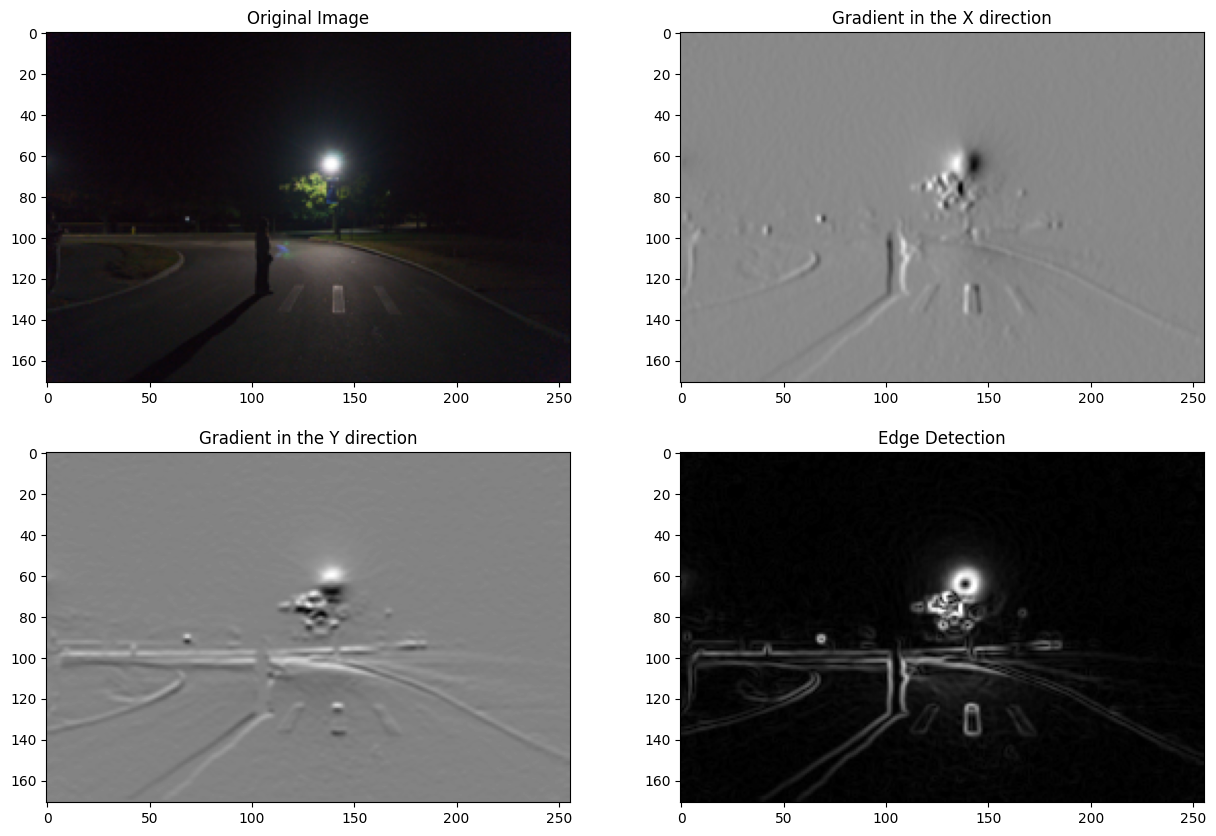

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os



image_path = "10-07_Pictures/20241007-1A.dng"
image = cv.imread(image_path)

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

blurred_image = cv.GaussianBlur(gray_image,(3,3),0)


Gx = cv.Sobel(blurred_image,cv.CV_64F,1,0,ksize=3)
Gy = cv.Sobel(blurred_image,cv.CV_64F,0,1,ksize=3)

G = cv.convertScaleAbs(cv.magnitude(Gx, Gy))

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(Gx,cmap='gray')
plt.title('Gradient in the X direction')

plt.subplot(2,2,3)
plt.imshow(Gy,cmap='gray')
plt.title('Gradient in the Y direction')

plt.subplot(2,2,4)
plt.imshow(G,cmap='gray')
plt.title('Edge Detection')

plt.show()


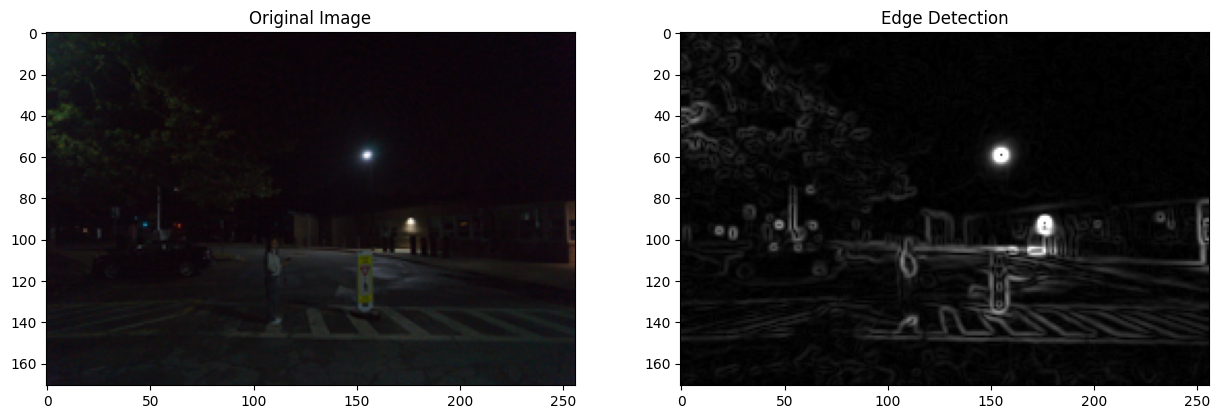

12.476516812865498


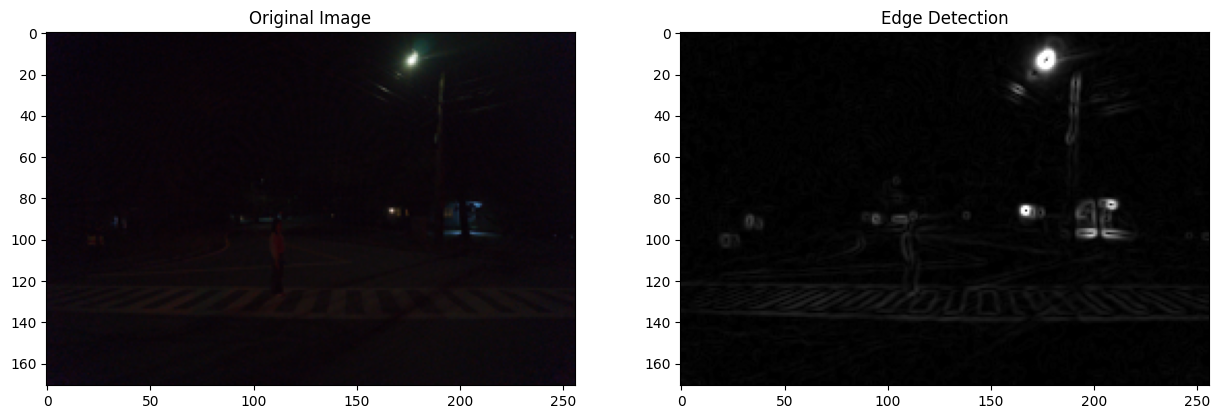

6.369174890350878


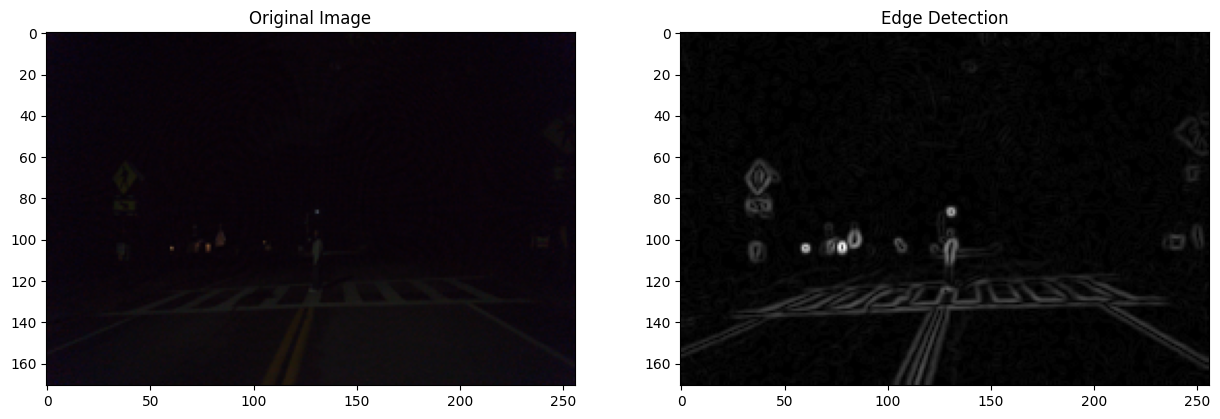

4.970394736842105


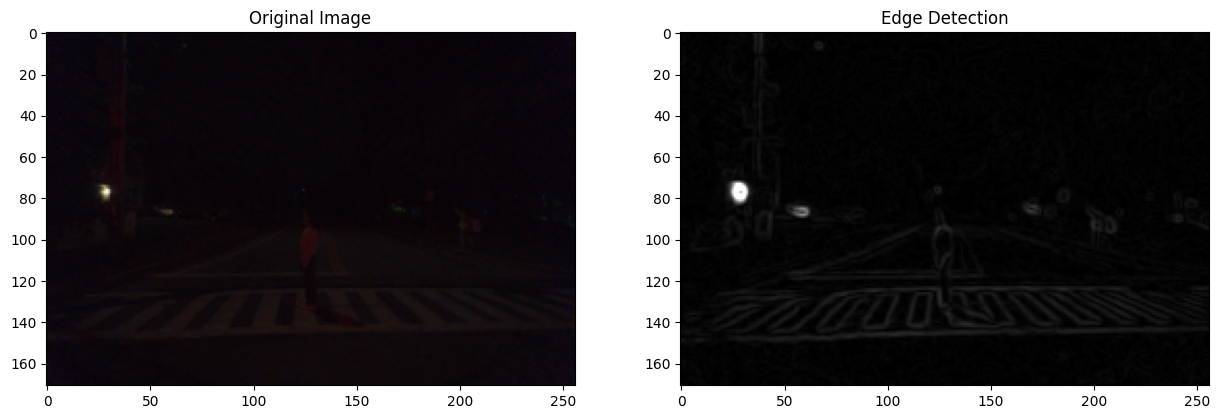

5.666415387426901


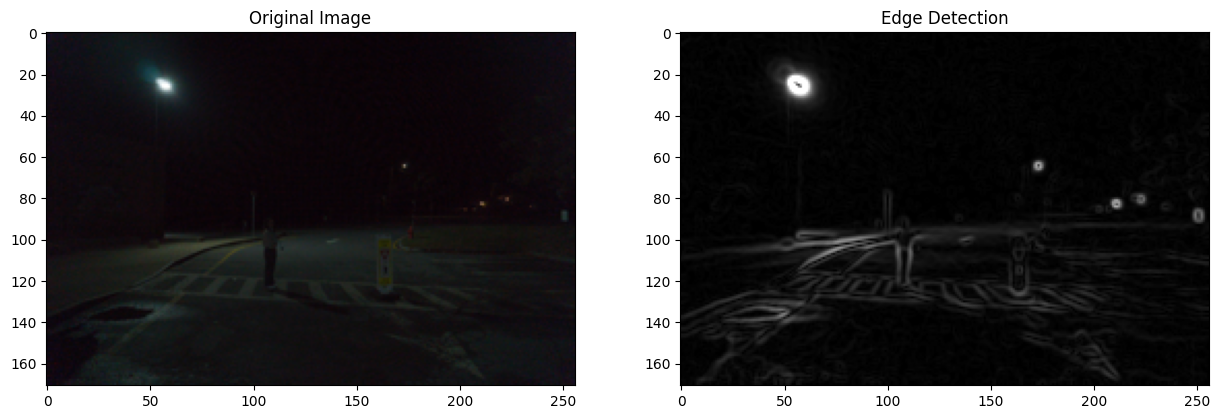

9.20266812865497


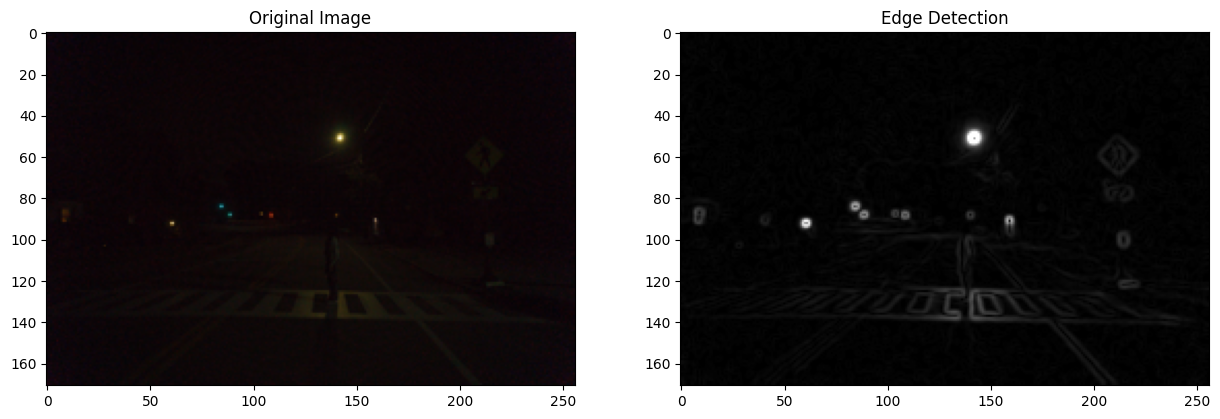

5.485243055555555


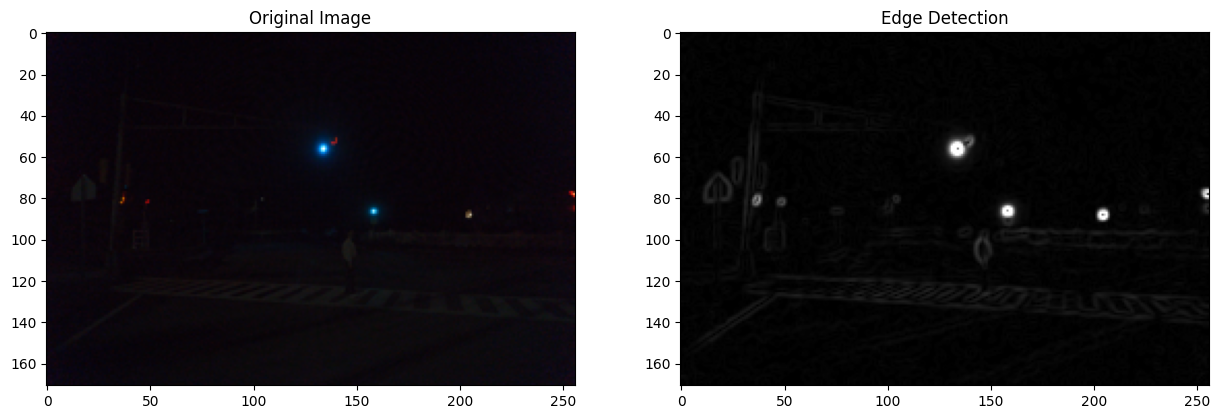

5.370568347953216


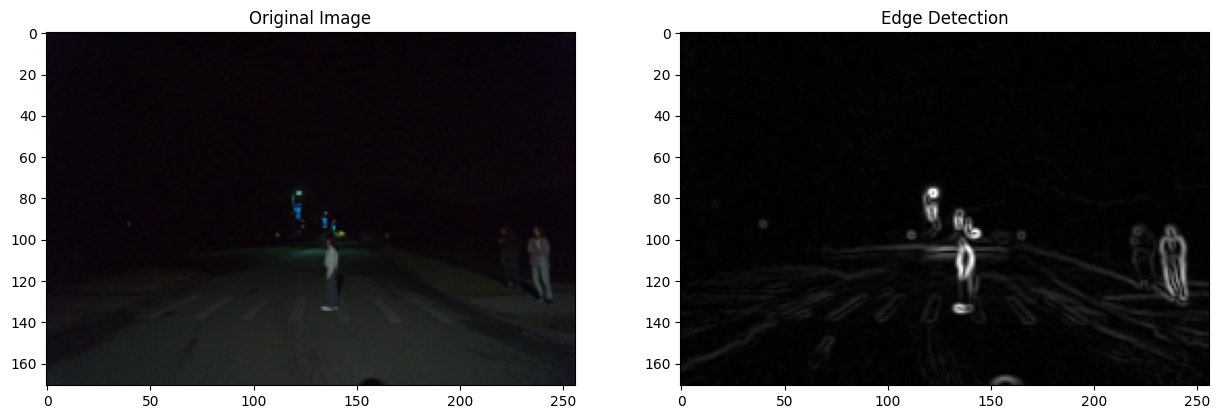

7.157392178362573


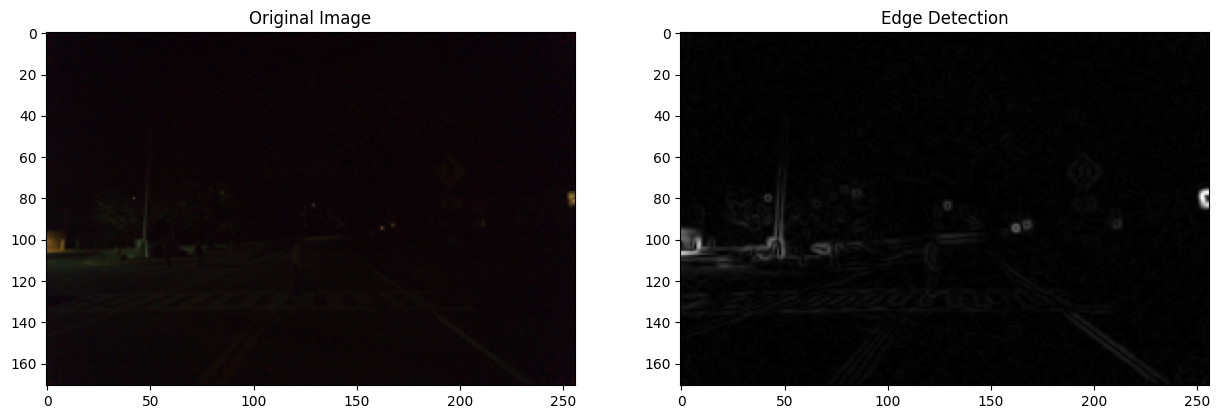

4.80953033625731


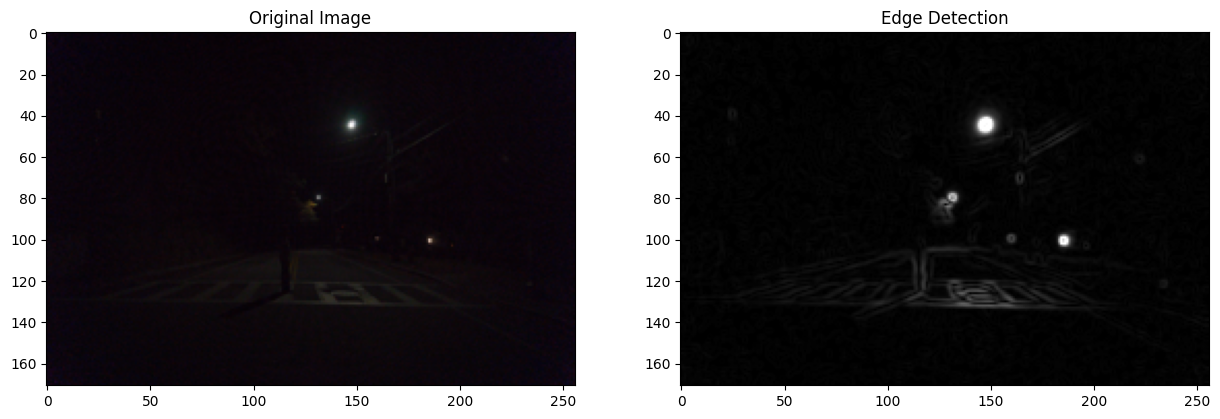

5.1170504385964914


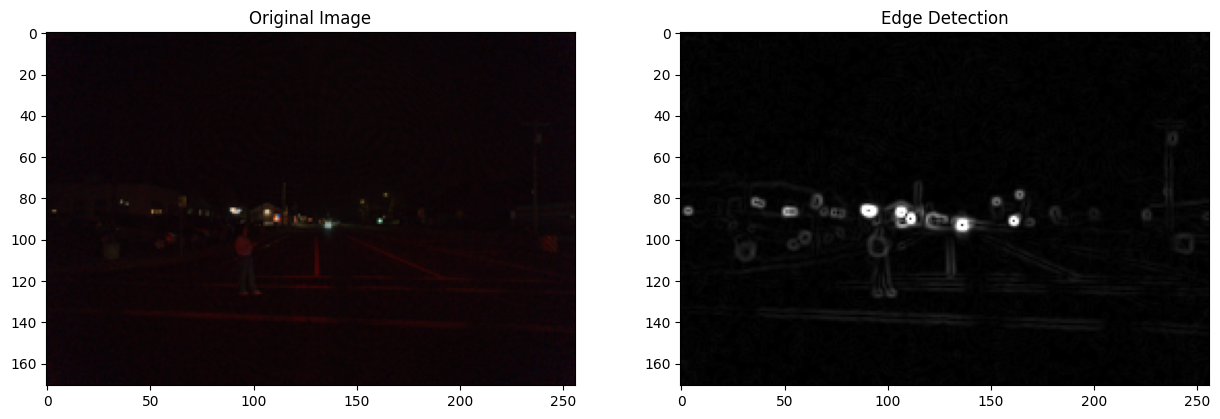

5.95796783625731


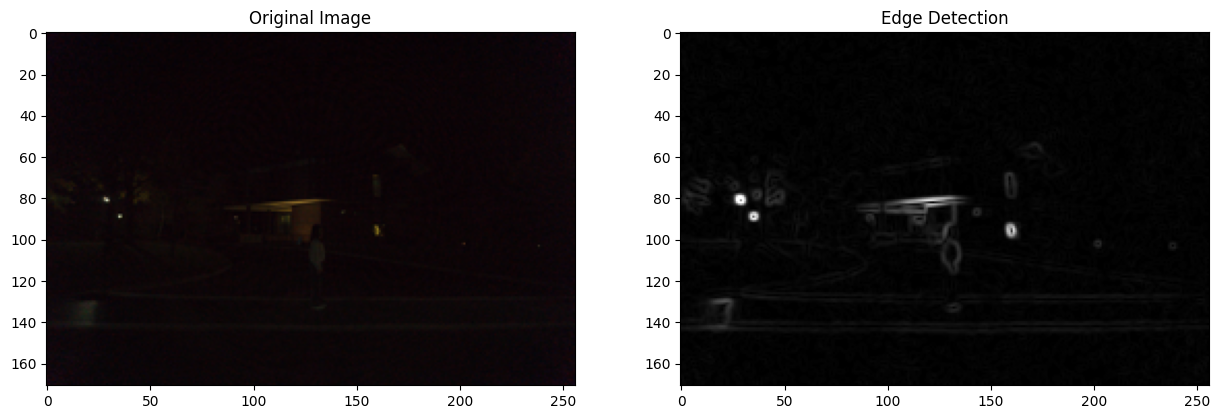

5.223729897660819


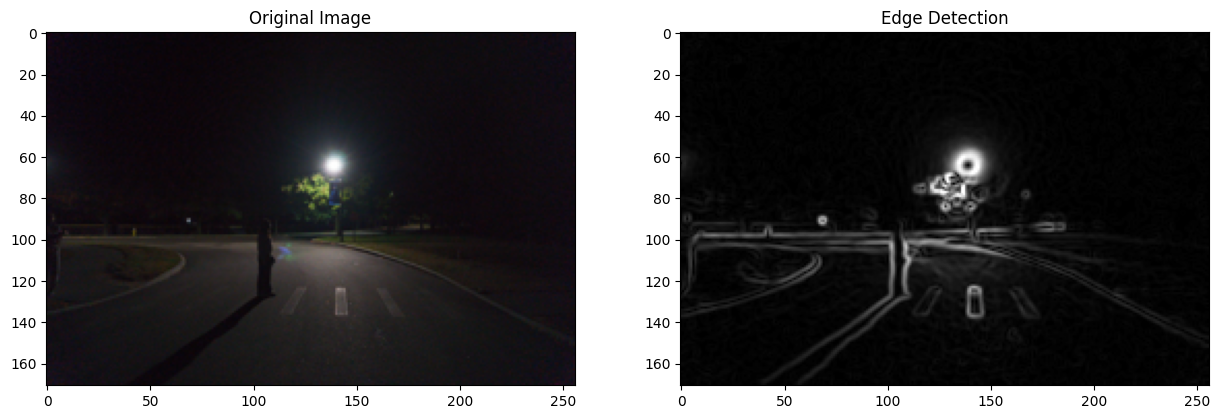

10.927471673976608


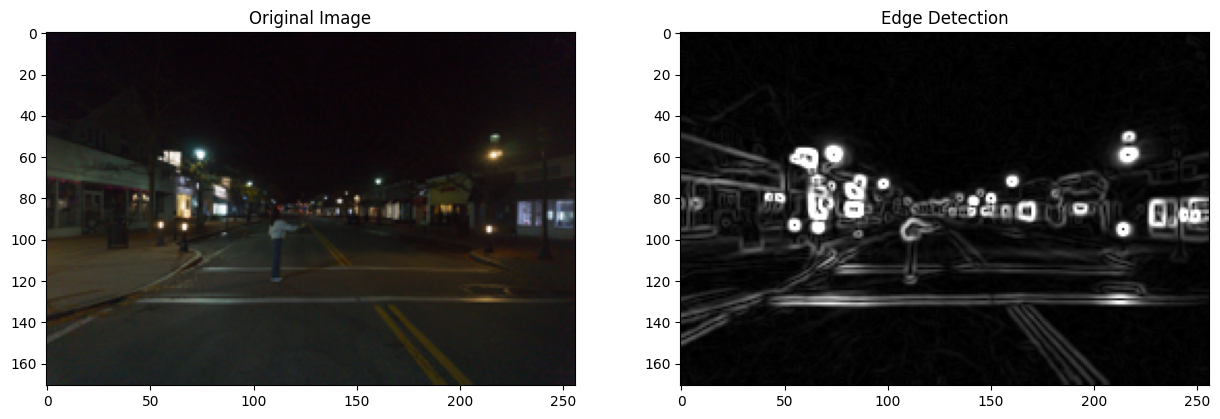

21.82625182748538


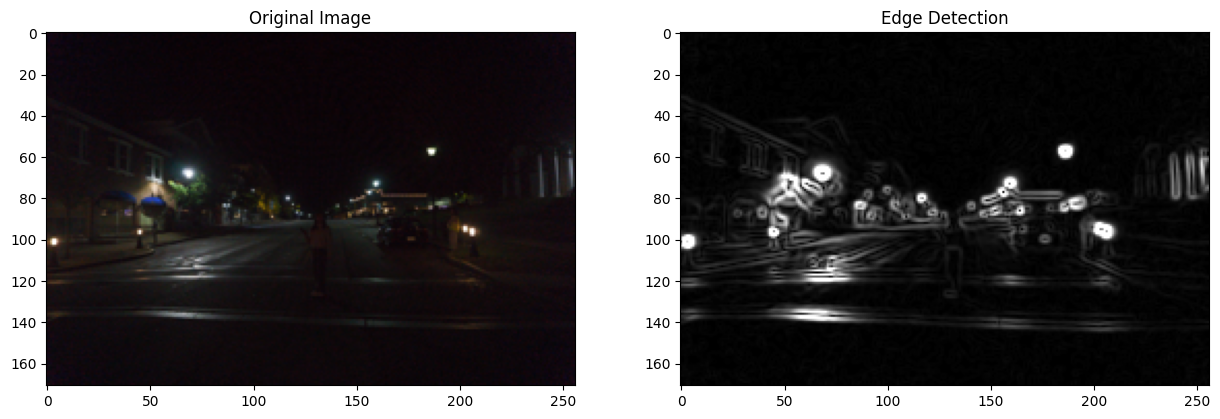

16.38013980263158


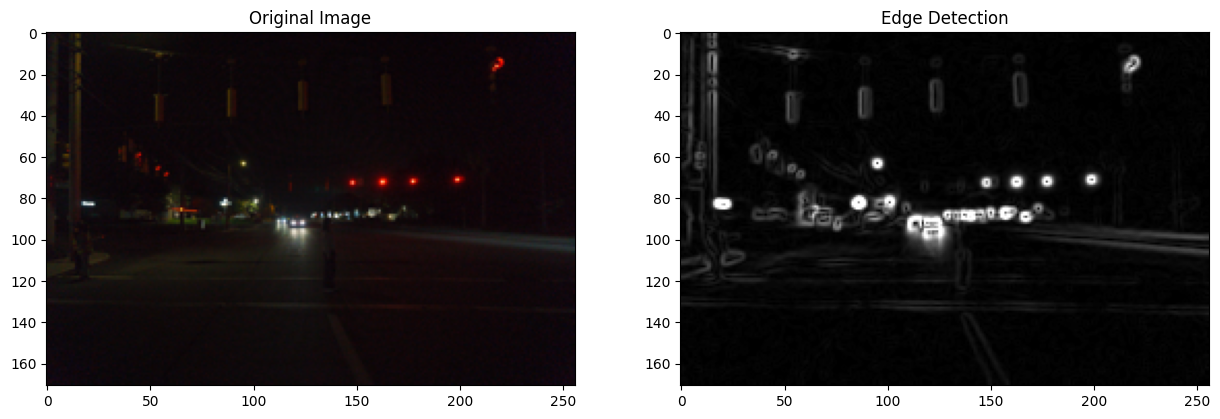

12.095531798245615


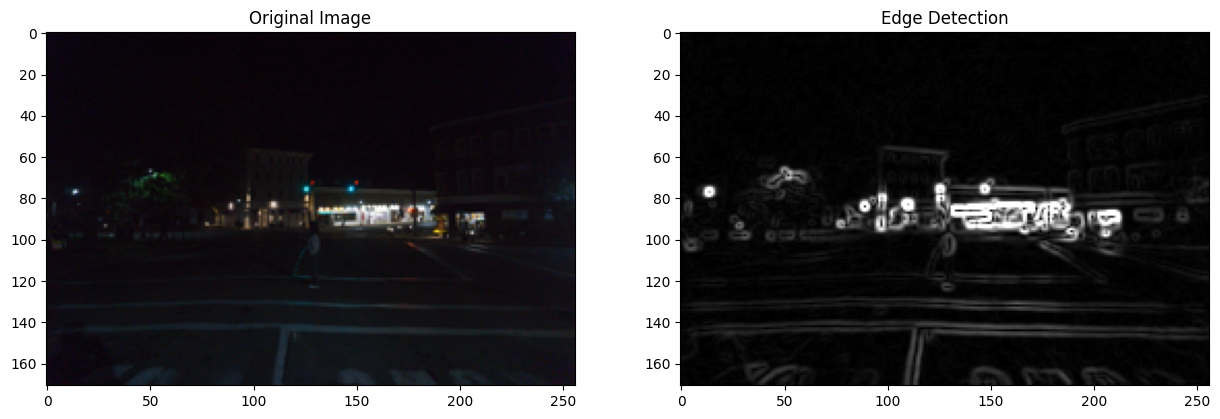

15.15060763888889


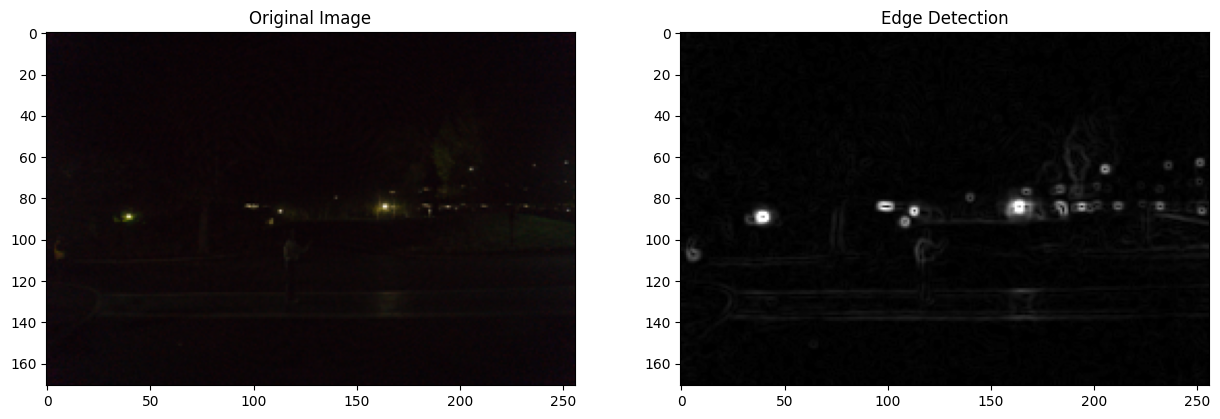

6.062043128654971


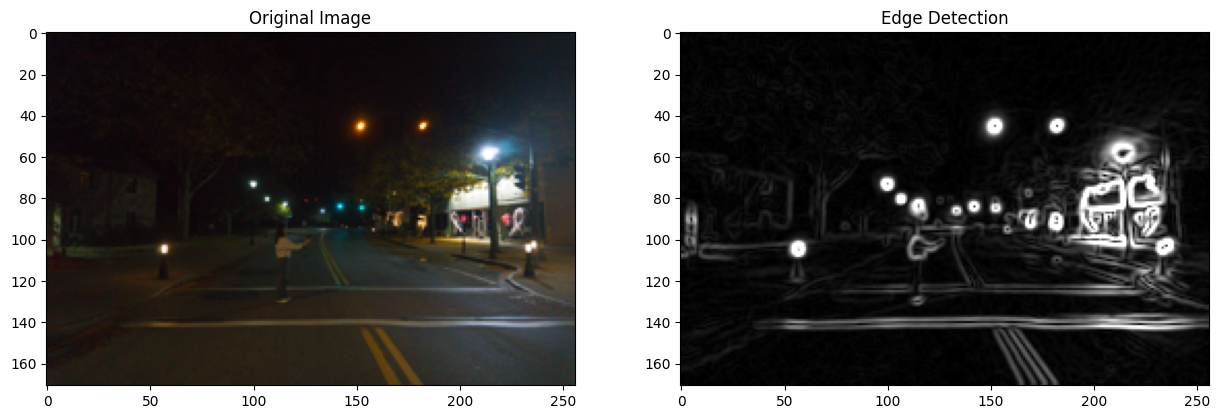

23.82424159356725


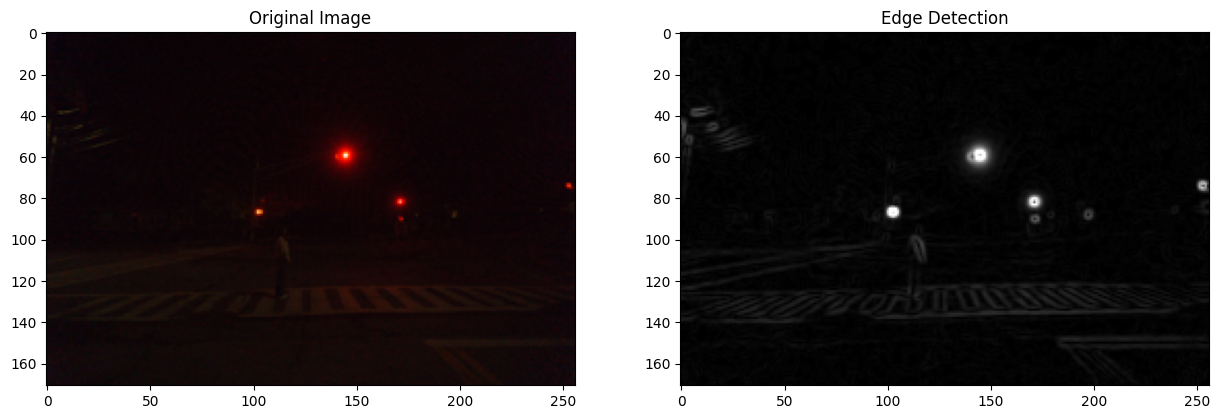

6.31421326754386


In [31]:
def detect_edges(image_path):
    image = cv.imread(str(image_path))
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    blurred_image = cv.GaussianBlur(gray_image,(3,3),0)


    Gx = cv.Sobel(blurred_image,cv.CV_64F,1,0,ksize=3)
    Gy = cv.Sobel(blurred_image,cv.CV_64F,0,1,ksize=3)

    G = cv.convertScaleAbs(cv.magnitude(Gx, Gy))
    avg_g = np.mean(G)
    


    # Gx = np.uint8(255*np.abs(Gx/np.max(Gx)))
    # Gy = np.uint8(255*np.abs(Gy/np.max(Gy)))
    # G = np.uint8(255*G/np.max(G))

    plt.figure(figsize=(15,10))

    # plt.subplot(2,2,1)
    # plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    # plt.title('Original Image')

    # plt.subplot(2,2,2)
    # plt.imshow(Gx,cmap='gray')
    # plt.title('Gradient in the X direction')

    # plt.subplot(2,2,3)
    # plt.imshow(Gy,cmap='gray')
    # plt.title('Gradient in the Y direction')

    # plt.subplot(2,2,4)
    # plt.imshow(G,cmap='gray')
    # plt.title('Edge Detection')
    
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1,2,2)
    plt.imshow(G,cmap='gray')
    plt.title('Edge Detection')

    plt.show()
    print(avg_g)

directory = "10-07_Pictures/"

for filename in os.listdir(directory):
    image_path = os.path.join(directory, filename)
    detect_edges(image_path)
# detect_edges("10-07_Pictures/20241007-1A.dng",100)



In [32]:
# def detect_edges_yuv(image_path):
#     image = cv.imread(str(image_path))
#     gray_image = cv.cvtColor(image, cv.COLOR_BGR2YUV)
    
#     y,u,v = cv.split(gray_image)
#     u = np.zeros(y.shape, dtype=np.uint8)
#     v = np.zeros(y.shape, dtype=np.uint8)

#     yuv_image = cv.merge((y, u, v))

#     blurred_image = cv.GaussianBlur(yuv_image,(3,3),0)


#     Gx = cv.Sobel(blurred_image,cv.CV_64F,1,0,ksize=3)
#     Gy = cv.Sobel(blurred_image,cv.CV_64F,0,1,ksize=3)

#     G = cv.convertScaleAbs(cv.magnitude(Gx, Gy))

#     plt.figure(figsize=(15,10))

#     plt.subplot(2,2,1)
#     plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
#     plt.title('Original Image')

#     plt.subplot(2,2,2)
#     plt.imshow(Gx,cmap='gray')
#     plt.title('Gradient in the X direction')

#     plt.subplot(2,2,3)
#     plt.imshow(Gy,cmap='gray')
#     plt.title('Gradient in the Y direction')

#     plt.subplot(2,2,4)
#     plt.imshow(G,cmap='gray')
#     plt.title('Edge Detection')

#     plt.show()

# directory = "10-07_Pictures"

# for filename in os.listdir(directory):
#     image_path = os.path.join(directory, filename)
#     detect_edges_yuv(image_path)

In [45]:
from pathlib import Path


from pedestrian_detection import (
    preprocess_image,
    resize_image,
    detect_pedestrians,
    upscale_boxes,
    draw_boxes,
    get_image_dir_from_env,
)

import pedestrian_illuminance as pi

image_dir = get_image_dir_from_env()
all_data = []

image_dir_path = Path("10-07_Pictures/20241007-1A.dng")
destination = Path("./cropped_images")



str_path = image_dir_path.as_posix()
if not destination.exists():
    os.makedirs(destination)
original_image = pi.read_raw_image(str_path)
enhanced_image = preprocess_image(str_path)
resized_image, scale_factor = resize_image(enhanced_image)
results = detect_pedestrians(resized_image)
boxes = upscale_boxes(results, scale_factor)

luminances = []
rms_data = []
csv_data = []
image_name = image_dir_path.name.split(".")[0]

for idx, box in enumerate(boxes):
    print(box)
    cropped = pi.crop_image(original_image, *box[:4])
    image_name = image_dir_path.name.split(".")[0]
    result_image_path = destination.joinpath(image_name + str(idx) + "-cv.jpg").as_posix()
    cv.imwrite(
        result_image_path,
        cropped
    )
    edges = detect_edges(cropped)
    # plt.imshow(edges)
    


0: 448x640 2 persons, 178.8ms
Speed: 2.1ms preprocess, 178.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
(81, 2046, 352, 2938, 0.7851828932762146, 0)


[ WARN:0@15608.312] global loadsave.cpp:241 findDecoder imread_('[[[ 90   0   0]
  [ 91   0   1]
  [110  10  39]
  ...
  [ 89  61  84]
  [ 72   0  38]
  [ 63   0  41]]

 [[ 60   9   0]
  [ 77  48  48]
  [ 83  37  59]
  ...
  [ 85  52 101]
  [ 70   0  70]
  [ 78   0  81]]

 [[ 52  19  13]
  [  0  57  48]
  [  0  38  34]
  ...
  [ 42   7  66]
  [ 75   0  68]
  [ 78   0  89]]

 ...

 [[ 29   0  14]
  [103  19  28]
  [113   0  42]
  ...
  [  0  27   0]
  [  0  51  84]
  [ 22   0  90]]

 [[ 66  35  45]
  [132   0   0]
  [154   0   6]
  ...
  [  0  55  42]
  [  0  37  59]
  [ 30   0   0]]

 [[ 54  35  38]
  [100  66  70]
  [110  49  49]
  ...
  [ 61  74  75]
  [ 16  42  40]
  [ 37  51   0]]]'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
